In [1]:
# 🚀 Telco Churn Project Boilerplate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

# Basic cleaning
df.dropna(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Preview
print(df.head())
print(df['Churn'].value_counts())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### Churn Distribution Plot

Shape: (7032, 21)
Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Churn Distribution:
 Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


/var/folders/mt/bh9ld2792435jwnggy8g8xz40000gn/T/ipykernel_65465/4187348521.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


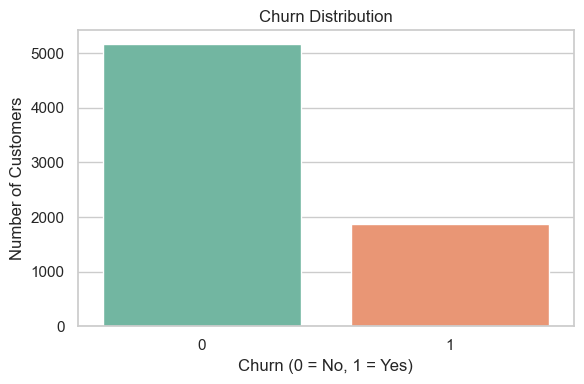

In [6]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load dataset
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

# 🧼 Data Cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 🔍 Dataset Overview
print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Churn Distribution:\n", df['Churn'].value_counts(normalize=True))

# 📊 Churn Distribution Plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


### Churn Rate by Contract Type

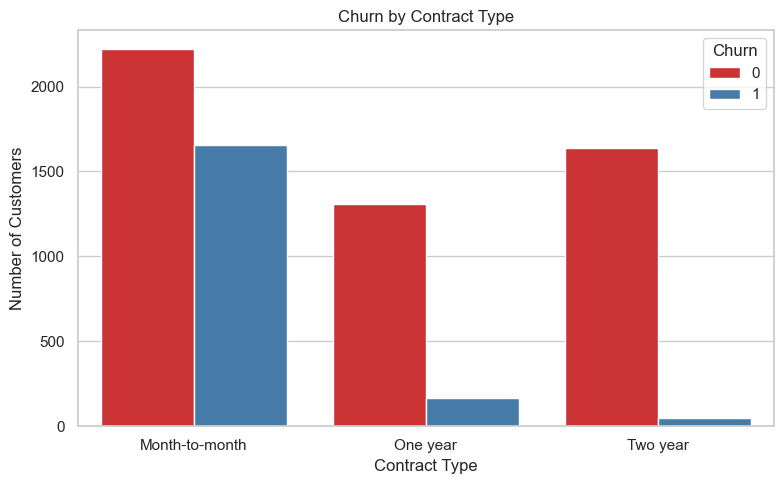

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### Churn Rate by Internet Service Type

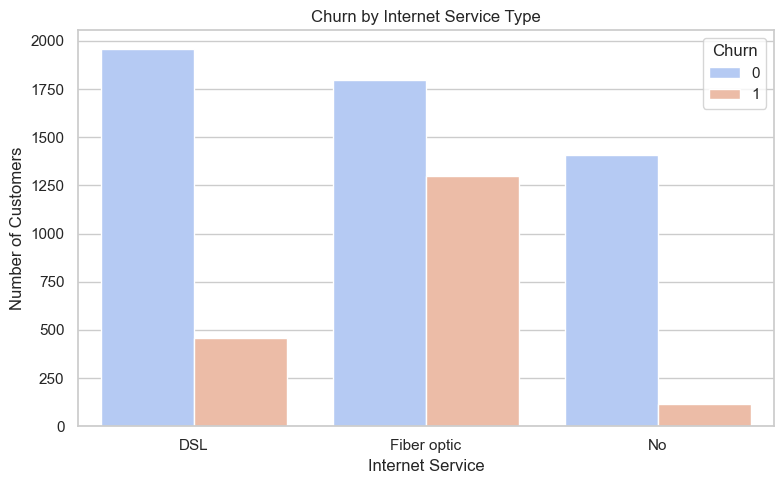

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### Churn vs Monthly Charges

/var/folders/mt/bh9ld2792435jwnggy8g8xz40000gn/T/ipykernel_65465/3144036479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')


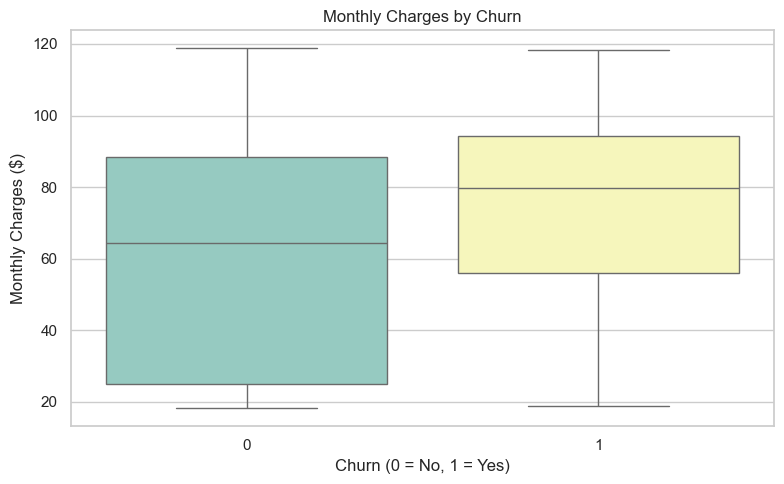

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()


### Churn vs Customer Tenure

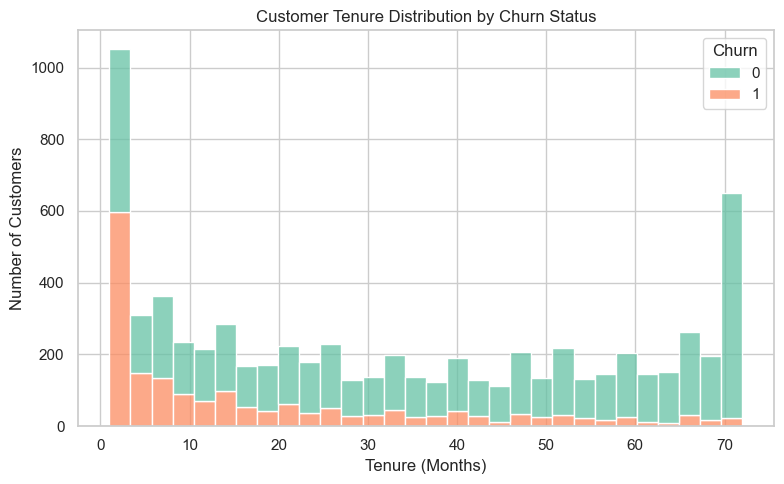

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='Set2')
plt.title('Customer Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Churn Rate by Contract Type (as percentages)

/var/folders/mt/bh9ld2792435jwnggy8g8xz40000gn/T/ipykernel_65465/3195432439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn, x='Contract', y='Churn Rate (%)', palette='Set2')


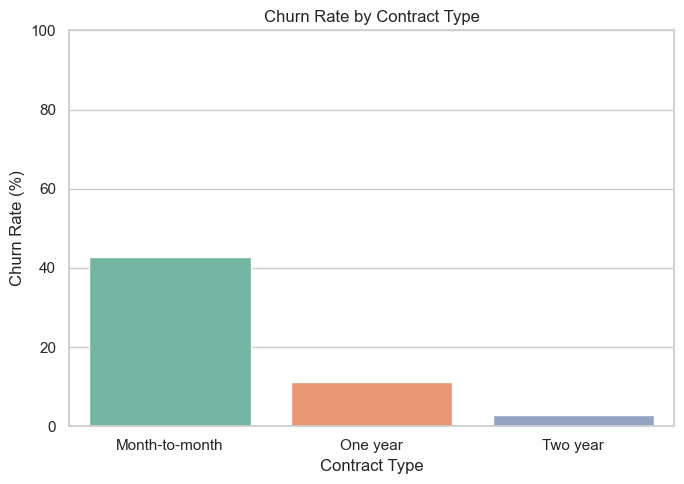

In [21]:
# Calculate % churn per contract type
contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()

# Convert to %
contract_churn['Churn Rate (%)'] = contract_churn['Churn'] * 100

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=contract_churn, x='Contract', y='Churn Rate (%)', palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### 🔍 Correlation Analysis
This heatmap shows how numerical features relate to each other and to churn. Negative correlation with `tenure` and positive correlation with `MonthlyCharges` are key churn drivers.


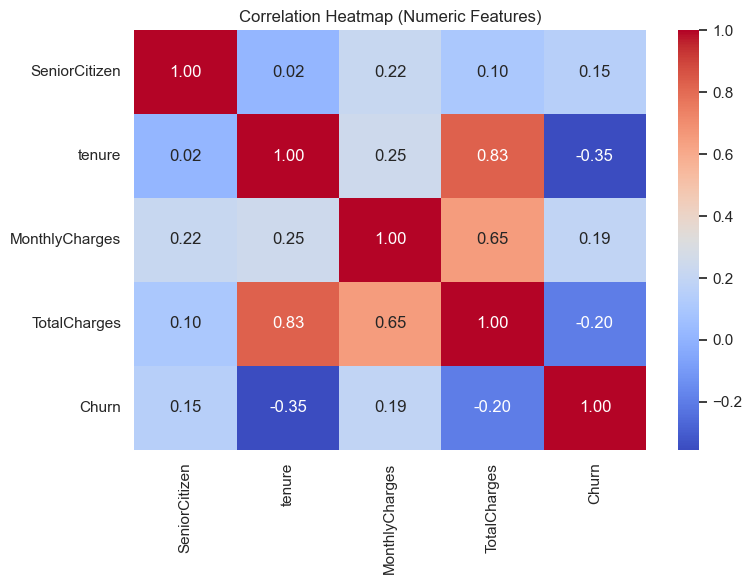

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


### Regression Model

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

# Drop customer ID if present
df = df.drop(columns=["customerID"], errors="ignore")

# Convert 'Churn' to numeric (Yes = 1, No = 0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Convert total charges to numeric (some entries might be blank)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df = df.dropna()

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

🧮 Confusion Matrix:
[[915 118]
 [181 193]]


### Random Forest Model

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

📉 Confusion Matrix:
 [[1391  158]
 [ 282  279]]


/var/folders/mt/bh9ld2792435jwnggy8g8xz40000gn/T/ipykernel_65465/1774603177.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')


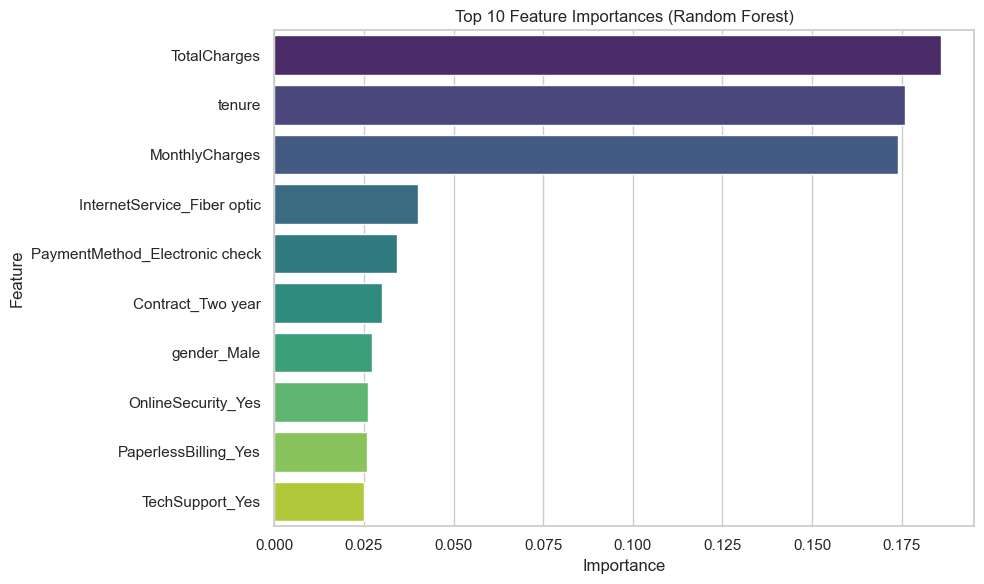

In [34]:
# 📦 Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Re-split the data if needed (assuming df, X, y already defined)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🌲 Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔍 Predictions
y_pred_rf = rf_model.predict(X_test)

# 📊 Evaluation
print("📋 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# 🔥 Feature importance (optional but recommended)
importances = rf_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# 📈 Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


### Gradient Boost Classifier

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

📉 Confusion Matrix:
[[1393  156]
 [ 266  295]]


/var/folders/mt/bh9ld2792435jwnggy8g8xz40000gn/T/ipykernel_65465/3850528830.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='rocket')


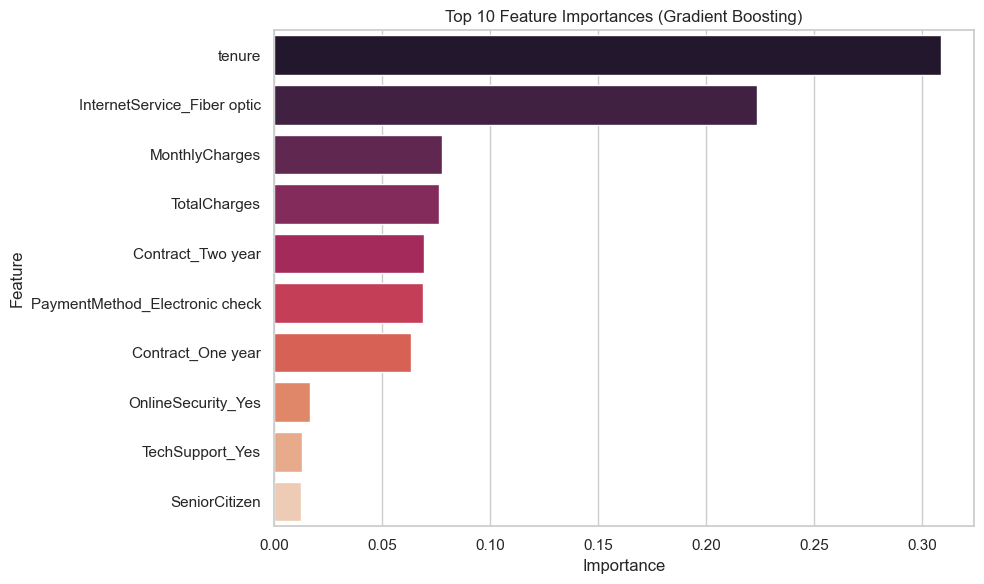

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Initialize and fit the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 2. Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# 3. Evaluate
print("📋 Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("📉 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)

# 4. Plot Feature Importances
feat_imp = gb_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': feat_imp})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='rocket')
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.tight_layout()
plt.show()
